In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# from os import chdir
# chdir('/content/drive/MyDrive/Machine Learning Project')

from sklearn.model_selection import train_test_split, cross_validate
from utils import load_data

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = load_data()
X, y = data.drop(columns=['subreddit','author','date','post']), data['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [2]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [3]:
rf = BalancedRandomForestClassifier(min_samples_leaf=0.05, max_features='sqrt', oob_score=True, random_state=0)

results = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)

/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the i

KeyboardInterrupt: 

In [ ]:
results

{'fit_time': array([176.49696684, 176.27687502, 175.58654404, 176.25390482,
        169.84191275]),
 'score_time': array([1.3611052 , 1.3591392 , 1.74414992, 1.37579918, 1.80027103]),
 'test_score': array([0.29405544, 0.29531034, 0.29642424, 0.29421054, 0.29706293]),
 'train_score': array([0.29354888, 0.29450063, 0.29649579, 0.29488486, 0.29839119])}

In [ ]:
rf = BalancedRandomForestClassifier(min_samples_leaf=0.05, max_features='sqrt', oob_score=True, random_state=0)
oob_error = []
num_trees = np.arange(20, 200, 10)

for m in tqdm(num_trees):
    rf.set_params(n_estimators=m)
    model = rf.fit(X, y)
    oob_error.append(1-model.oob_score_)

  0%|          | 0/18 [00:00<?, ?it/s]/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
100%|██████████| 18/18 [13:33<00:00, 45.18s/it]


Text(0.5, 0, 'Number of trees')

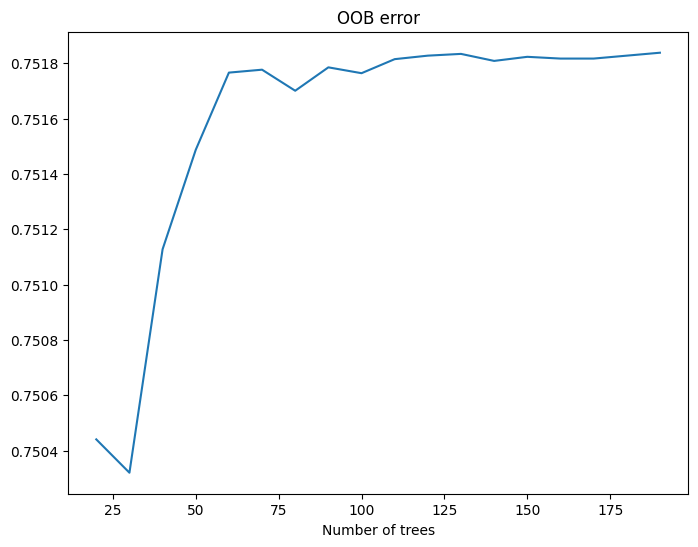

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(num_trees, oob_error)
plt.title('OOB error')
plt.xlabel('Number of trees')